In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="5" color="red" >ch10_N차원 배열 다루기</font></b>
- [numpy]https://numpy.org/doc/stable/
- [numpy API] https://numpy.org/doc/stable/reference/index.html
- N차원 배열 객체
- 2차원 배열은 행렬개념
- numpy 패키지는 C언어로 구현되어 고성능 수치 계산 패키지
# 1절 넘파이 패키지

In [5]:
import numpy as np
np.__version__

'1.23.5'

In [27]:
# np.arange(from, stop, step) : from부터 stop앞까지 step 씩 증감한 정수값을 배열로 생성
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열 속성

In [4]:
from numpy import arange
a = arange(15).reshape(3,5) # 3행 5열짜리 2차원 배열로 return
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [8]:
type(a) # a변수의 타입

numpy.ndarray

In [9]:
a.dtype # a배열 요소의 type

dtype('int32')

In [10]:
a.dtype.name

'int32'

In [11]:
a.itemsize # 한 요소의 사이즈

4

In [12]:
a.ndim # 차원수(축수)

2

In [13]:
a.size # 배열 요소의 갯수

15

In [14]:
a.shape # 배열의 구조(튜플)

(3, 5)

## 1.2 배열 변경(구조,타입)

In [29]:
# 구조변경
print('구조변경 전', a, sep='\n')
a.shape = (5, 3)
print('구조변경 후', a, sep='\n')

구조변경 전
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
구조변경 후
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [38]:
# 타입변경(X)
a = arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [39]:
a.dtype

dtype('int32')

In [40]:
a.itemsize

4

In [41]:
a.size, a.shape

(12, (3, 4))

In [42]:
a.dtype = np.int64 # a 배열을 읽을 때 64bit씩 읽는다
a.dtype

dtype('int64')

In [43]:
a.itemsize

8

In [44]:
a.size, a.shape

(6, (3, 2))

In [45]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [57]:
# 타입변경(O)
a = a.astype('int64')
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [58]:
a.astype(np.int64)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [59]:
a.astype('int64')

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [60]:
a.dtype

dtype('int64')

In [61]:
a.itemsize

8

In [62]:
a.size, a.shape

(12, (3, 4))

In [63]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [64]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [56]:
a.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

## 1.3 배열 저장

- 배열 저장 pkl npy
- 딥러닝모델 저장 h5 keras
- 머신러닝 모델 저장 pkl joblib

In [65]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [80]:
import pickle
with open('data/ch10_a.pkl', 'wb') as f:
    pickle.dump(a, f)

In [81]:
with open('data/ch10_a.pkl', 'rb') as f:
    load_a = pickle.load(f)

In [82]:
load_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [83]:
np.all(a == load_a)# a넘파이배열과 load_a 넘파이 배열이 같은지

True

In [86]:
np.save('data/ch10_a.npy', a)

In [87]:
load_a2 = np.load('data/ch10_a.npy')
np.all(load_a2==a)

True

# 2절. 넘파이 배열
- array() 함수 : 다른 파이썬 데이터 구조를 배열로 변환
- arange(), ones(), zeros(), empty()
- 랜덤값을 갖는 함수들 ...
## 2.1 array()함수로 넘파이 배열 만들기
array(리스트나 튜플, dtype=np.xxx , copy=T/F)

In [91]:
a = np.array([2, 4, 6], dtype=np.int8) # 정수의 기본 타입은 int32 / 실수의 기본 타입은 float64
a

array([2, 4, 6], dtype=int8)

In [94]:
a[0], a[1], a[2]

(2, 4, 6)

In [95]:
a.dtype

dtype('int8')

In [98]:
b= np.array([[1.3,2.4],
          [4,5]])
b

array([[1.3, 2.4],
       [4. , 5. ]])

In [99]:
b.dtype

dtype('float64')

In [102]:
b= np.array([[1.3,2.4],[4,5]], dtype=np.float32).reshape(1,4)
b

array([[1.3, 2.4, 4. , 5. ]], dtype=float32)

In [103]:
b.itemsize

4

In [104]:
b.astype(np.float64)

array([[1.29999995, 2.4000001 , 4.        , 5.        ]])

In [106]:
l = [[1,2],[3.4,4.5]]
for row in l:
    for data in row:
        print(data,end='\t')
    print()

1	2	
3.4	4.5	


In [118]:
c = np.array([[1,2],[3.4,4.5]], dtype = np.float16)
for i, row in enumerate(c):
    for j, item in enumerate(row):
        print("{}행{}열:{}".format(i, j, item), end='\t')
    print()

0행0열:1.0	0행1열:2.0	
1행0열:3.400390625	1행1열:4.5	


In [121]:
c = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]], dtype=np.int16)
c

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]], dtype=int16)

In [122]:
c[0,3]

4

In [124]:
c[:,1:3]

array([[2, 3],
       [7, 8]], dtype=int16)

In [130]:
c[0,2:]

array([3, 4, 5], dtype=int16)

In [133]:
# 모든 행의 맨 마지막 열만 추출
c[:,-1]

array([ 5, 10], dtype=int16)

In [134]:
# 모든 행의 맨 마지막 열을 제외한 추출
c[:,:-1]

array([[1, 2, 3, 4],
       [6, 7, 8, 9]], dtype=int16)

In [139]:
c = np.array([[1,2],[3,4]])
d = np.array(c, copy=False) # d=c 얕은 복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1, 0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('c주소={}, d주소={}'.format(id(c),id(d)))

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[   1    2]
 [3333    4]]
d=
[[   1    2]
 [3333    4]]
c주소=1877045943280, d주소=1877045943280


In [140]:
c = np.array([[1,2],[3,4]])
d = np.array(c, copy=True) # d=c 얕은 복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1, 0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('c주소={}, d주소={}'.format(id(c),id(d)))

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[1 2]
 [3 4]]
d=
[[   1    2]
 [3333    4]]
c주소=1877045940400, d주소=1877045941456


## 2.2 기본값이 있는 배열 만들기
- np.zeros(tuple) : 요소들이 다 0
- np.ones(tup) : 요소들이 다 1
- np.full( tup, 기본값) : 요소들이 다 기본값
- np.empty(tup) : 요소들이 임의의 값(메모리 상태에 따라 달라짐)
- 위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64. dtype속성 따라 지정 가능

In [143]:
np.zeros( (3, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [146]:
x = np.ones((3, 5))
x.dtype, x

(dtype('float64'),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]))

In [147]:
np.full((2,5), -256)

array([[-256, -256, -256, -256, -256],
       [-256, -256, -256, -256, -256]])

In [6]:
np.empty((2,5))

array([[6.23042070e-307, 4.67296746e-307, 1.69121096e-306,
        1.29061074e-306, 1.89146896e-307],
       [7.56571288e-307, 3.11525958e-307, 1.24610723e-306,
        1.29061142e-306, 5.53353523e-322]])

## 2.3 랜덤값을 갖는 배열 만들기
- np.random.random(tup) : 0부터 1미만의 균등분포를 갖는 랜덤값
- np.random.uniform(low=0, high=1.0, size=tup) : low부터 high미만의 균등분포를 갖는 랜덤값
- np.random.normal(loc=0, scale=1.0 size=tup) : 평균 loc과 표준편차 scale을 갖는 정규 분포 랜덤값
- np.random.rand(n) : 균등분포의 1차원 난수 배열 발생(난수 n개)
- np.random.randn(n) : 표준정규분포(평균0, 표준편차1인 정규분포)의 1차원 난수 배열 발생(난수n개)
-     cf. np.random.randint(n) : 0부터 0미만의 정수 난수 1개 발생

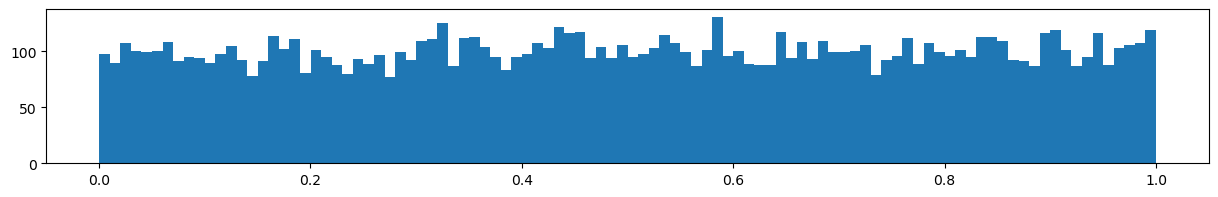

In [6]:
import matplotlib.pyplot as plt
x = np.random.rand(10000)
plt.figure(figsize=(15,2)) # 그래프 크기 figsize=(가로,세로)
plt.hist(x, bins = 100)
plt.show()

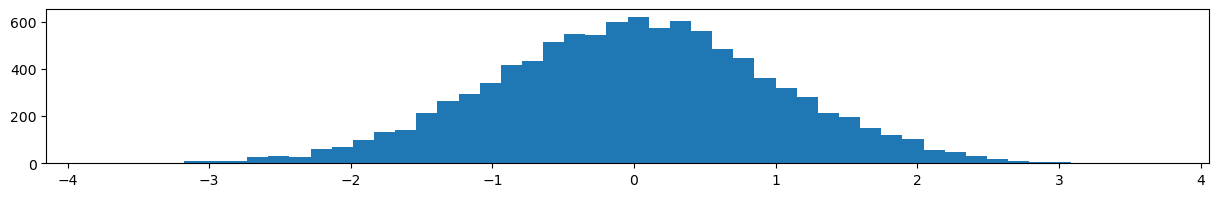

In [41]:
x = np.random.randn(10000)
plt.figure(figsize=(15,2)) # 그래프 크기 figsize=(가로,세로)
plt.hist(x, bins = 50)
plt.show()

In [51]:
# 2차원 난수 배열
np.random.seed(12124) # sed값을 맞추면 발생되는 난수 순서가 동일
np.random.random((2,5)) # 0부터 1미만의 난수 배열

array([[0.63107615, 0.77078095, 0.88627894, 0.57516029, 0.45540303],
       [0.03489997, 0.16166098, 0.75299393, 0.46978328, 0.03683761]])

In [65]:
np.random.uniform(-1, 10,(2,5)) # -1부터 10 미만의 균등분포 난수 배열

array([[ 2.84920419,  2.60499996,  2.42120993,  0.06585224,  7.6856822 ],
       [ 9.77388667, -0.70848042, -0.55637475,  1.50047833,  3.40649318]])

In [71]:
np.random.normal(10, 2) # 평균10, 표준편차 2인 정규분포 난수 배열

7.975608771573324

## 2.4 연속된 값을 갖는 배열 만들기
- np.arange(from, stop, by, dtype) : from부터 stop앞까지 by씩 증감하는 정수 배열
- np.linspace(from, to, count) : from부터 to까지(to포함) count개 숫자를 1차원 배열로 생성

In [72]:
np.linspace(0,2,20)

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

In [75]:
# linspace : 많은 수의 점들을 생성
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x)


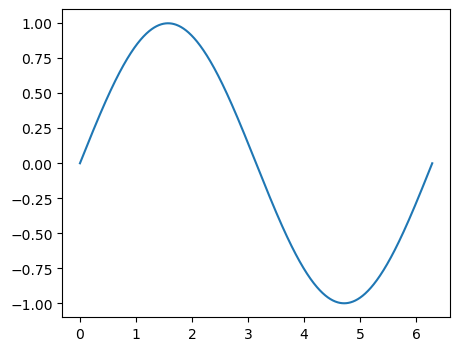

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.plot(x,y)
plt.show()

In [77]:
np.linspace(0, 2, 20).reshape(2,10)

array([[0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842],
       [1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]])

In [78]:
np.arange(10,30,3,dtype=np.int8)

array([10, 13, 16, 19, 22, 25, 28], dtype=int8)

## 2.5 배열의 차원 변경하기
- reshape([면수,] 행수, 열수) : -1이 올 수도
- resize([면수,] 행수, 열수) : -1 불가
- T : 전치행렬로 변환
- transpose() : 전치행렬로 변환 !!실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열 수정됨

In [7]:
a = np.random.random((2,3))
a

array([[0.73644542, 0.27903178, 0.77490588],
       [0.7819377 , 0.10025147, 0.06420341]])

In [10]:
a = np.round(a * 10) # round : 반올림 / floor : 내림 / ceil : 올림
a

array([[700., 300., 800.],
       [800., 100., 100.]])

In [19]:
a.reshape(3,-1) # -1이 주어지면 해당 차원의 크기가 자동 계산(자동 나누기)

array([[700., 300.],
       [800., 800.],
       [100., 100.]])

In [23]:
a.resize((2,3)) # 결과를 출력하지 않는 함수는 배열을 바꿈 (-1 불가)